# Neurônio Perceptron

Um neurônio tipo Perceptron capaz de fazer separações lineares.

Vamos construir um neurônio que aprende a resolver um OU, isto é, um neurônio que produz saídas y=1 para X1 OR X2 conforme a tabela-verdade:



```
X1 X2 Y
0  0  0
0  1  1
1  0  1
1  1  1
```





In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Vamos definir dois vetores que estão na mesma ordem que tabela-verdade mostrada anteriormente:
- X: array com os valores das amostras por coluna
- T: vetor com os valores de saída esperados (target) para cada uma das amostras

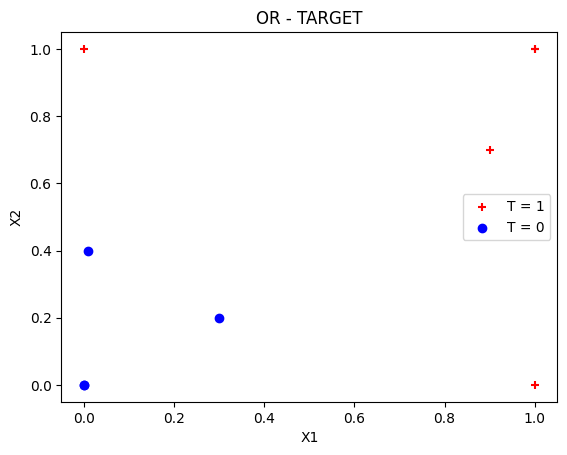

In [ ]:
X = np.array([[0, 0.01, 0.3, 0, 1, 1, 1, 0, 0.9],
              [0, 0.4, 0.2, 1, 0, 1, 1, 0, 0.7]])
T = np.array([0, 0, 0, 1, 1, 1, 1, 0, 1])

plt.title("OR - TARGET")
plt.scatter(X[0, T == 1], X[1, T == 1], marker='+', c='r', label='T = 1')
plt.scatter(X[0, T == 0], X[1, T == 0], marker='o', c='b', label='T = 0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='best')
plt.show()

Criamos um neurônio perceptron

In [ ]:
# cria uma rede neural perceptron
from sklearn.linear_model import Perceptron

# cria um objeto Perceptron
net = Perceptron()

# treina o neuronio com os dados de entrada e saída desejada
net.fit(X.T, T)

w = [.0, .0, .0]                 # para armazenar os pesos aprendidos
w[0] = net.intercept_[0]
w[1] = net.coef_[0][0]
w[2] = net.coef_[0][1]
print(f"w0={w[0]:.2f}, w1={w[1]:.2f}, w2={w[2]:.2f}")

w0=-1.00, w1=1.60, w2=1.50


Observe que uma vez que uma das entradas estejam ligada (x1 ou x2) será suficiente para atingir o limiar w0 (que está multiplicado por -1).

Vamos plotar o separador linear utilizando o vetor de pesos

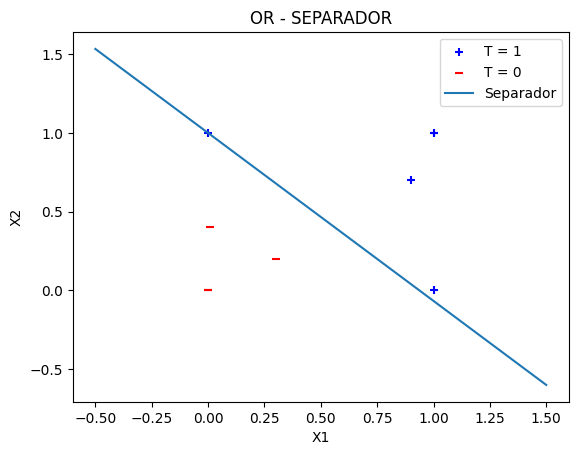

In [ ]:
plt.scatter(X[0, T == 1], X[1, T == 1], marker='+', c='b', label='T = 1')
plt.scatter(X[0, T == 0], X[1, T == 0], marker='_', c='r', label='T = 0')
plt.title('OR - SEPARADOR')
plt.xlabel('X1')
plt.ylabel('X2')
x_line = np.linspace(-0.5, 1.5)
y_line = (-(w[1] * x_line) / w[2]) - w[0]
plt.plot(x_line, y_line, label='Separador')
plt.legend()
plt.show()

Vamos simular o fornecimento de uma entrada para o modelo aprendido.
Damos o par (1, 0) e, obviamente, esperamos que produza a saída y=1.



In [ ]:
# simula a submissão de um exemplo
x = np.array([[0], [0]])
y = net.predict(x.T)
print("Entrada:")
print(x.T)
print("Saída:")
print(y)

Entrada:
[[0 0]]
Saída:
[0]


Observe que funciona para valores aproximados.
Se damos como entrada (0.0, 0.501) o neurônio produz saída 1 já que
-1 + 0.0\*2 + 0.501\*2 >= 0   (deveria funcionar com 0.5, mas a implementação aparentemente está com >)

In [ ]:
# simula a submissão de um exemplo
x = np.array([[0.0], [0.7]])
y = net.predict(x.T)
print(f"Entrada")
print(x.T)
print("Saída:")
print(y)

Entrada
[[0.  0.7]]
Saída:
[1]
